In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import random
import math
from datetime import timedelta
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
hotels = pd.read_csv('hotel_pp.csv')

In [4]:
hotels

,booking_bool,click_bool,comp1_inv,comp1_rate,comp1_rate_percent_diff,comp2_inv,comp2_rate,comp2_rate_percent_diff,comp3_inv,comp3_rate,...,visitor_location_country_id,year,date_time_split,srch_month,srch_year,booking_month,vis_star,vis_usd,prop_hist_price,cat_price_usd
0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,187,2013,2013-04-04 08:32:15,4,2013,4,0,0,3,3
1,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,...,187,2013,2013-04-04 08:32:15,4,2013,4,0,0,3,4
2,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,...,187,2013,2013-04-04 08:32:15,4,2013,4,0,0,4,3
3,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,...,187,2013,2013-04-04 08:32:15,4,2013,4,0,0,3,3
4,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,187,2013,2013-04-04 08:32:15,4,2013,4,0,0,4,4
5,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,187,2013,2013-04-04 08:32:15,4,2013,4,0,0,4,4
6,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,...,187,2013,2013-04-04 08:32:15,4,2013,4,0,0,3,2
7,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,...,187,2013,2013-04-04 08:32:15,4,2013,4,0,0,3,5
8,0.0,0.0,NaN,NaN,NaN,0.0,0.0,23.0,0.0,0.0,...,187,2013,2013-04-04 08:32:15,4,2013,4,0,0,1,3
9,1.0,1.0,NaN,NaN,NaN,0.0,0.0,11.0,0.0,0.0,...,187,2013,2013-04-04 08:32:15,4,2013,4,0,0,1,2


In [5]:
def categorize_comp_rates(df):
    
    
    df['all_comp_rates'] = df[['comp1_rate', 'comp2_rate', 'comp3_rate', 'comp4_rate', 'comp5_rate', 'comp6_rate', 'comp7_rate','comp8_rate']].min(axis=1)
    df['all_comp_rates'] = df['all_comp_rates'].fillna(2)
    
    df.update(df[['comp1_rate', 'comp2_rate', 'comp3_rate','comp4_rate','comp5_rate','comp6_rate','comp7_rate','comp8_rate']].fillna(0))
    
    df['count_comp_rates'] = df['comp1_rate'] + df['comp2_rate'] + df['comp3_rate'] + df['comp4_rate'] + df['comp5_rate'] + df['comp6_rate'] + df['comp7_rate'] + df['comp8_rate']
    df = df.drop(['comp1_rate', 'comp2_rate', 'comp3_rate','comp4_rate','comp5_rate','comp6_rate','comp7_rate','comp8_rate'], axis=1)
    return df
    
def categorize_comp_inv(df):
    
    df.update(df[['comp1_inv', 'comp2_inv', 'comp3_inv','comp4_inv','comp5_inv','comp6_inv','comp7_inv','comp8_inv']].fillna(0))
    
    df['count_comp_inv'] = df['comp1_inv'] + df['comp2_inv'] + df['comp3_inv'] + df['comp4_inv'] + df['comp5_inv'] + df['comp6_inv'] + df['comp7_inv'] + df['comp8_inv']
    df = df.drop(['comp1_inv', 'comp2_inv', 'comp3_inv','comp4_inv','comp5_inv','comp6_inv','comp7_inv','comp8_inv'], axis=1)
    return df
    
def categorize_comp_perc(df):
    
    df['comps_perc_diff'] = df[['comp1_rate_percent_diff', 'comp2_rate_percent_diff','comp3_rate_percent_diff','comp4_rate_percent_diff','comp5_rate_percent_diff','comp6_rate_percent_diff','comp7_rate_percent_diff','comp8_rate_percent_diff']].mean(axis=1)
    df['comps_perc_diff'] = pd.qcut(df['comps_perc_diff'], 4, labels = [1, 2, 3, 4])
    df['comps_perc_diff'] = df['comps_perc_diff'].cat.add_categories([0])
    df['comps_perc_diff'] = df['comps_perc_diff'].fillna(0)
    df = df.drop(['comp1_rate_percent_diff', 'comp2_rate_percent_diff','comp3_rate_percent_diff','comp4_rate_percent_diff','comp5_rate_percent_diff','comp6_rate_percent_diff','comp7_rate_percent_diff','comp8_rate_percent_diff'], axis=1)
    
    df['comps_perc_diff'] = df['comps_perc_diff'].astype('int64')
    
    return df

def book_click(df):
    
    df["book_click"] = df["booking_bool"] + df["click_bool"]
    
    return df

In [6]:
hotels = categorize_comp_rates(hotels)

In [7]:
hotels = categorize_comp_inv(hotels)

In [8]:
# hotels = categorize_comp_perc(hotels)

In [9]:
hotels.to_csv('all_hotel_pp_done.csv', index = False)  

In [10]:
hotels.tail()

,booking_bool,click_bool,comp1_rate_percent_diff,comp2_rate_percent_diff,comp3_rate_percent_diff,comp4_rate_percent_diff,comp5_rate_percent_diff,comp6_rate_percent_diff,comp7_rate_percent_diff,comp8_rate_percent_diff,...,srch_month,srch_year,booking_month,vis_star,vis_usd,prop_hist_price,cat_price_usd,all_comp_rates,count_comp_rates,count_comp_inv
9917525,NaN,NaN,NaN,22.0,127.0,27.0,22.0,NaN,NaN,NaN,...,5,2013,5,0,0,1,0,-1.0,2.0,0.0
9917526,NaN,NaN,NaN,NaN,NaN,16.0,22.0,NaN,NaN,NaN,...,5,2013,5,0,0,1,0,0.0,1.0,0.0
9917527,NaN,NaN,NaN,55.0,NaN,16.0,3.0,NaN,NaN,NaN,...,5,2013,5,0,0,1,1,0.0,1.0,0.0
9917528,NaN,NaN,NaN,43.0,43.0,12.0,12.0,NaN,NaN,NaN,...,5,2013,5,0,0,1,0,-1.0,0.0,0.0
9917529,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,...,5,2013,5,0,0,1,1,0.0,0.0,0.0


In [11]:
test = hotels[hotels['booking_bool'].isnull()].reset_index()
train = hotels[hotels['booking_bool'].isnull() == False]

In [12]:
test = test.drop(['comp1_rate_percent_diff', 'comp2_rate_percent_diff','comp3_rate_percent_diff','comp4_rate_percent_diff',
                  'comp5_rate_percent_diff','comp6_rate_percent_diff','comp7_rate_percent_diff','comp8_rate_percent_diff'], 
                 axis=1)

train = train.drop(['comp1_rate_percent_diff', 'comp2_rate_percent_diff','comp3_rate_percent_diff','comp4_rate_percent_diff',
                  'comp5_rate_percent_diff','comp6_rate_percent_diff','comp7_rate_percent_diff','comp8_rate_percent_diff'], 
                 axis=1)

In [13]:
# sort the positions within search IDs
train = train.sort_values(by = ['srch_id', 'position'], ascending = [True, True])

In [14]:
# skip the missing values in positions
train['data_pos'] = train.groupby('srch_id').cumcount()

In [15]:
# DOWNSAMPLING

# use all clicked data
pos_train = train[(train["click_bool"] == 1)]

# use a random sample of each search
groups = train.groupby('srch_id',group_keys = False).groups
neg_train = train.loc[[random.choice(groups.get(key)) for key in groups]]

In [16]:
# combine these samples
sel_train = pd.concat([pos_train, neg_train])

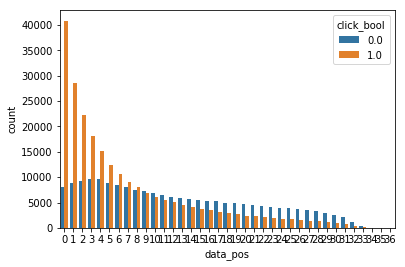

In [17]:
sns.countplot(x = "data_pos", hue = "click_bool", data = sel_train)

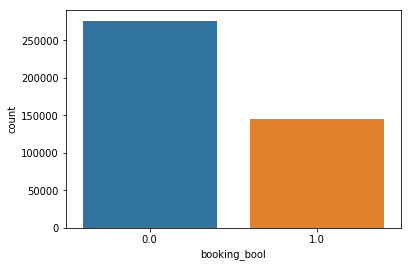

In [18]:
# view positive-negative data
sns.countplot(x = "booking_bool", data = sel_train)

In [19]:
sel_train = book_click(sel_train)

In [20]:
X_train = sel_train.drop(['booking_bool', 'position', 'srch_id', 'click_bool', 'date_time_split', 'data_pos', 
                          'gross_bookings_usd', 'book_click'], axis=1)
Y_train = sel_train['book_click']
X_test = train.drop(['booking_bool', 'position', 'srch_id', 'click_bool', 'date_time_split', 'data_pos', 
                     'gross_bookings_usd'], axis=1)
X_real_test = test.drop(['booking_bool', 'position', 'srch_id', 'click_bool', 'date_time_split', 'data_pos', 
                          'gross_bookings_usd', 'index'], axis=1)

In [21]:
X_real_test.head()

,month,orig_destination_distance,price_usd,promotion_flag,prop_brand_bool,prop_country_id,prop_id,prop_location_score1,prop_location_score2,prop_log_historical_price,...,srch_month,srch_year,booking_month,vis_star,vis_usd,prop_hist_price,cat_price_usd,all_comp_rates,count_comp_rates,count_comp_inv
0,2,0,119.0,0,1,219,3180,3.0,0.1,5.03,...,2,2013,2,0,0,3,2,2.0,0.0,0.0
1,2,0,118.0,0,1,219,5543,3.0,0.1,4.93,...,2,2013,2,0,0,3,2,0.0,0.0,0.0
2,2,0,49.0,0,1,219,14142,3.0,0.1,4.16,...,2,2013,2,0,0,1,0,0.0,1.0,0.0
3,2,0,143.0,0,1,219,22393,2.0,0.1,5.03,...,2,2013,2,0,0,3,3,0.0,0.0,0.0
4,2,0,79.0,0,1,219,24194,3.0,0.2,4.72,...,2,2013,2,0,0,2,1,0.0,0.0,0.0


In [22]:
X_train.shape, Y_train.shape, X_test.shape, X_real_test.shape

((421674, 34), (421674,), (4958347, 34), (4959183, 34))

In [23]:
X_train.head()

,month,orig_destination_distance,price_usd,promotion_flag,prop_brand_bool,prop_country_id,prop_id,prop_location_score1,prop_location_score2,prop_log_historical_price,...,srch_month,srch_year,booking_month,vis_star,vis_usd,prop_hist_price,cat_price_usd,all_comp_rates,count_comp_rates,count_comp_inv
9,4,0,100.89,0,1,219,68914,2.0,0.0,4.44,...,4,2013,4,0,0,1,2,0.0,0.0,-1.0
41,12,3,129.00,0,1,219,139893,2.0,0.0,5.25,...,12,2012,2,0,0,4,3,2.0,0.0,0.0
60,6,4,145.00,0,1,100,104251,2.0,0.1,0.00,...,6,2013,6,0,0,0,3,2.0,0.0,0.0
78,3,1,85.00,0,1,219,27669,3.0,0.2,4.62,...,3,2013,3,0,0,1,1,0.0,0.0,1.0
112,2,3,45.00,0,1,219,20499,2.0,0.1,4.11,...,2,2013,4,0,0,0,0,0.0,0.0,0.0


In [24]:
# X_train.to_csv('xtrain.csv', index = False)  
# Y_train.to_csv('ytrain.csv', index = False)  
# X_real_test.to_csv('xtest.csv', index = False)

In [25]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=300, max_depth=None)
scores = cross_val_score(clf, X_train, Y_train)
print(scores.mean())

classifier = clf.fit(X_train, Y_train)
# predictions = classifier.predict_proba(X_test)
# print(type(predictions))

real_predictions = classifier.predict_proba(X_real_test)

C:\Users\tessa\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.5902213885184255


In [31]:
print(scores)

[0.58662199 0.58363807 0.60040411]


In [49]:
real_predictions

array([[0.2, 0. , 0.8],
       [0.3, 0. , 0.7],
       [0.4, 0.2, 0.4],
       ...,
       [0.7, 0. , 0.3],
       [0.5, 0.1, 0.4],
       [0.4, 0. , 0.6]])

In [26]:

testing_pred = test[["srch_id", "prop_id"]].reset_index()
testing_pred.head()

testing_pred = pd.concat([testing_pred, pd.DataFrame(real_predictions)], axis=1)
testing_pred = testing_pred.drop(['index'], axis=1)

testing_pred.columns = ['srch_id', 'prop_id', 'none', 'click', 'book']

print(testing_pred)

         srch_id  prop_id      none     click      book
0              1     3180  0.513333  0.066667  0.420000
1              1     5543  0.500000  0.070000  0.430000
2              1    14142  0.410000  0.150000  0.440000
3              1    22393  0.606667  0.076667  0.316667
4              1    24194  0.296667  0.156667  0.546667
5              1    28181  0.190000  0.080000  0.730000
6              1    34263  0.356667  0.080000  0.563333
7              1    37567  0.330000  0.070000  0.600000
8              1    50162  0.390000  0.040000  0.570000
9              1    54937  0.176667  0.033333  0.790000
10             1    56050  0.663333  0.080000  0.256667
11             1    61632  0.763333  0.073333  0.163333
12             1    61934  0.253333  0.050000  0.696667
13             1    63894  0.510000  0.053333  0.436667
14             1    72090  0.486667  0.103333  0.410000
15             1    73666  0.626667  0.070000  0.303333
16             1    74045  0.380000  0.096667  0

In [27]:
result = testing_pred.sort_values(by = ['srch_id', 'book', 'click'], ascending = [True, False, False])
result

,srch_id,prop_id,none,click,book
23,1,99484,0.096667,0.043333,0.860000
9,1,54937,0.176667,0.033333,0.790000
5,1,28181,0.190000,0.080000,0.730000
12,1,61934,0.253333,0.050000,0.696667
7,1,37567,0.330000,0.070000,0.600000
25,1,128085,0.360000,0.040000,0.600000
8,1,50162,0.390000,0.040000,0.570000
6,1,34263,0.356667,0.080000,0.563333
4,1,24194,0.296667,0.156667,0.546667
16,1,74045,0.380000,0.096667,0.523333


In [28]:
result = result.drop(["none", "book", "click"], axis = 1)

In [29]:
result.to_csv('tree300_result_pred.csv', index = False)  

In [71]:
testing_pred = train[["srch_id", "prop_id", "data_pos", "booking_bool", "click_bool"]]

testing_pred = pd.concat([testing_pred, pd.DataFrame(predictions)], axis=1)


testing_pred.columns = ['srch_id', 'prop_id', 'data_pos', 'booking_bool', 'click_bool', 'none', 'click', 'book']

In [60]:
print(testing_pred)

         srch_id  prop_id  data_pos  booking_bool  click_bool  none  click  \
0              1    95307         0           0.0         0.0   0.4    0.5   
1              1    74474         1           0.0         0.0   0.5    0.5   
2              1    53341         2           0.0         0.0   0.5    0.5   
3              1    29604         3           0.0         0.0   0.3    0.4   
4              1    89073         4           0.0         0.0   0.4    0.4   
5              1    30184         5           0.0         0.0   0.7    0.3   
6              1    88218         6           0.0         0.0   0.4    0.5   
7              1    56880         7           0.0         0.0   0.6    0.4   
8              1   107872         8           0.0         0.0   0.5    0.4   
9              1    68914         9           1.0         1.0   0.4    0.1   
10             1    81437        10           0.0         0.0   0.3    0.6   
11             1    44147        11           0.0         0.0   

In [61]:
result = testing_pred.sort_values(by = ['srch_id', 'book','click'], ascending = [True, False, False])

result['pred_pos'] = result.groupby(['srch_id']).cumcount()
result = result[result.pred_pos < 5]
conditions = [((result.booking_bool == 1.0) & (result.click_bool == 1.0)), 
              ((result.booking_bool == 0.0) & (result.click_bool == 1.0)),
              ((result.booking_bool == 0.0) & (result.click_bool == 0.0))]
labels = [5, 1, 0]
result['rel'] = np.select(conditions, labels)


result['DCG'] = result.rel/np.log2(result.pred_pos + 2)

print(sum(result.DCG))
print(sum(result.booking_bool))
result

577225.6151282964
130972.0


,srch_id,prop_id,data_pos,booking_bool,click_bool,none,click,book,pred_pos,rel,DCG
9,1,68914,9,1.0,1.0,0.4,0.1,0.5,0,5,5.0
20,1,122844,20,0.0,0.0,0.1,0.5,0.4,1,0,0.0
21,1,85728,21,0.0,0.0,0.6,0.0,0.4,2,0,0.0
12,1,59526,12,0.0,0.0,0.1,0.6,0.3,3,0,0.0
15,1,88096,15,0.0,0.0,0.1,0.6,0.3,4,0,0.0
32,4,83806,4,0.0,0.0,0.3,0.4,0.3,0,0,0.0
45,4,3625,17,0.0,0.0,0.2,0.6,0.2,1,0,0.0
44,4,109185,16,0.0,0.0,0.4,0.4,0.2,2,0,0.0
38,4,97099,10,0.0,0.0,0.5,0.3,0.2,3,0,0.0
51,4,137826,23,0.0,0.0,0.5,0.3,0.2,4,0,0.0
